# profit_estimation_of_companies-master

In [2]:
#Importing Libreries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
data = pd.read_csv('profit_estimation_of_companies-master/1000_Companies.csv')   #Loading Data Set

X = data.iloc[:,:-1].values    #Selecting all Columns except PROFIT (index = -1)
y = data.iloc[: , -1].values    #Selecting Last column PROFIT (index = -1 or 4)

data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

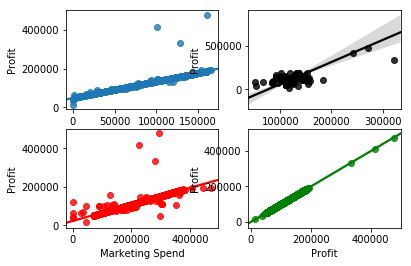

In [4]:
#Mapping Corr in Data

# sb.heatmap(data.corr())

ax = plt.subplot(2,2,1)

sb.regplot(x='R&D Spend',y='Profit',data=data)

ax = plt.subplot(2,2,2)

sb.regplot(x='Administration',y='Profit',data=data,color='k')

ax = plt.subplot(2,2,3)

sb.regplot(x='Marketing Spend',y='Profit',data=data,color='r')

ax = plt.subplot(2,2,4)

sb.regplot(x='Profit',y='Profit',data=data,color='g')

# sb.countplot(x='R&D',data = 'data')

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

# print(X)

onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

# print(X[0].size)

# data.head(5)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [5]:
####  Avoiding dummy variable trap
X = X[:,1:]



In [6]:


##Spliting Data into Train and Test Data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.9,random_state=0)

####  Crerating a LinearRegression Object

lin_reg = LinearRegression()

# Traing The Model with data

lin_reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
y_pre = lin_reg.predict(X_test)
print(y_pre)

[ 89011.3311681   87654.25335727  94091.19189332 175365.2947652
  83365.91054003 110397.29457681 136076.57599844  90686.1137572
 164166.2711108   53487.92310795  66279.21057521 150369.9544427
 125959.8878389   58702.97576714 176318.66195307  75308.84831002
 118204.90481781 163440.51467813 149324.79850255 181555.48506057
  90850.2238661   84910.20621572 180651.83443764  83392.56791238
 104154.40628437 100400.02365075  40887.10597688  56961.39568529
  68216.18505278 201202.4269126  120723.48405574 110841.58004502
 101356.37228884 137822.32263933  63313.11165059 107988.21509793
 185482.38477962 171147.16559769 174333.60817558 117630.98644753
  96622.39985295 164314.2028997  106860.02139748  50473.99766168
 116478.87950698  58000.95062966 158182.75976266  78686.52618593
 159487.74078756 131033.5174994  184521.51315517 174298.59233722
  92947.62540845  78319.35757622 180238.5473899   84578.58389502
 142740.76884261 170159.10615166  84314.75474154 105157.7274066
 141505.81949585  52627.97042

In [8]:
##### Calculation of Cofficient and Intercepts

print(lin_reg.coef_)

print(lin_reg.intercept_)


[-5.37705197  8.3584841   0.50565554  0.18093273  0.16671066]
17592.22213516223


In [9]:

# R2 squre value

from sklearn.metrics import r2_score

print(r2_score(y_test,y_pre))

0.8924625667351724
